Some imports:

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import numpy as np
import sympy as sym
from sympy import init_printing, latex
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# 1 geometric series

Let $c \in (-1, 1)$.
- Infinite series
   $$
   1 + c + c^2 + \cdots = \frac{1}{1-c}
   $$
- finite series
    $$
    1 + c + c^2 + \cdots + c^T = \frac{1 - c^{T+1}}{1 - c}
    $$
    - it works for any $c$.
    


Examples
- money multiplier
- keynesian multiplier
- interest rates and present values

### 1.3 simulation on interest rate and present values

In [32]:
# True present value of a finite lease
def finite_lease_pv_true(T, g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return (x_0 * (1 - G**(T + 1) * R**(-T - 1))) / (1 - G * R**(-1))
# First approximation for our finite lease

def finite_lease_pv_approx_1(T, g, r, x_0):
    p = x_0 * (T + 1) + x_0 * r * g * ((T + 1) ** 1) / (r - g)
    return p

# Second approximation for our finite lease
def finite_lease_pv_approx_2(T, g, r, x_0):
    return (x_0 * (T + 1))

# Infinite lease
def infinite_lease(g, r, x_0):
    G = (1 + g)
    R = (1 + r)
    return x_0 / (1 - G * R**(-1))

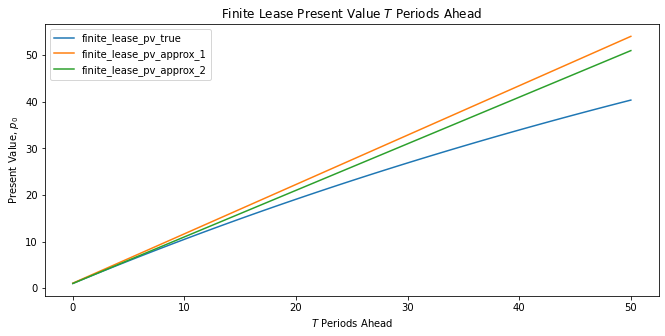

In [33]:
def plot_function(axes, x_vals, func, args):
    axes.plot(x_vals, func(*args), label=func.__name__)

T_max = 50

T = np.arange(0, T_max+1)
g = 0.02
r = 0.03
x_0 = 1

our_args = (T, g, r, x_0)
funcs = [finite_lease_pv_true,
        finite_lease_pv_approx_1,
        finite_lease_pv_approx_2]
        ## the three functions we want to compare

fig, ax = plt.subplots()
ax.set_title('Finite Lease Present Value $T$ Periods Ahead')
for f in funcs:
    plot_function(ax, T, f, our_args)
ax.legend()
ax.set_xlabel('$T$ Periods Ahead')
ax.set_ylabel('Present Value, $p_0$')
plt.show()

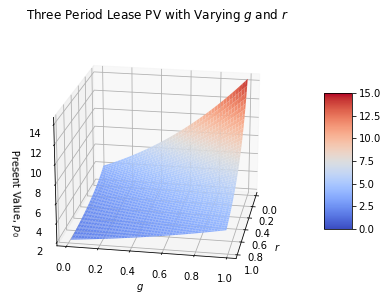

In [13]:
# Second view
fig = plt.figure()
T = 3
ax = plt.subplot(projection='3d')
r = np.arange(0.01, 0.99, 0.005)
g = np.arange(0.011, 0.991, 0.005)

rr, gg = np.meshgrid(r, g)
z = finite_lease_pv_true(T, gg, rr, x_0)

# Removes points where undefined
same = (rr == gg)
z[same] = np.nan
surf = ax.plot_surface(rr, gg, z, cmap=cm.coolwarm,
    antialiased=True, clim=(0, 15))
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$r$')
ax.set_ylabel('$g$')
ax.set_zlabel('Present Value, $p_0$')
ax.view_init(20, 10)
ax.set_title('Three Period Lease PV with Varying $g$ and $r$')
plt.show()

# 2 SIR model

- 4 states: susceptible, exposed, infected and removed.
- let
    - $\beta(t)$ denote the transmission rate
    - $\sigma$ be the infection rate
    - $\gamma$ be the recovery rate
    - $\dot{y}$ be the time derivative $dy / dt$.

The dynamics of populaiton fraction at each state is
$$
\dot{s} (t) = - \beta (t) s(t) i(t) \\
\dot{e} (t) = \beta (t) s(t) i(t) - \sigma e (t) \\
\dot{i} = \sigma e (t) - \gamma i(t)
$$
The removed fraction of population is
$$
\dot{r} = 1 - \dot{s} - \dot{e} - \dot{i} 
$$
Cumulative caseload is $c = i + r$.
- all those who have or have had the infection.

The system can be rewritten as
$$
\dot{x} = F(x, t), \quad x := (s, e, i)
$$
for suitable definition of $F$.

calibration
- $\sigma, \gamma$ fixed biologically to $1/5/2$ and $1/18$ respectively.
- transmission rate is $\beta(t): = R0(t) \gamma$,
    - $R0(t)$ is the effective reproduction number at time $t$.

# 3 linear algebra

# 4 QR decomposition